# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green? 

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

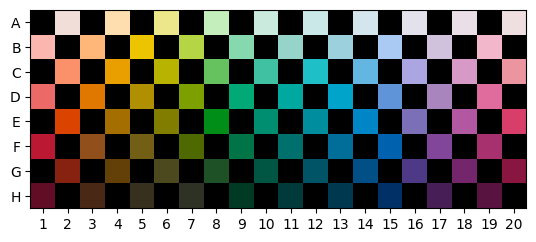

In [ ]:
def plot_colors(color_column):
    fig, ax = plt.subplots() # Create a figure and its axis
    for idx, row in df.iterrows():  # Loop through each rows of the Dataframe
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), # Position of the bottom-left border
                                   1, 1, # Size of a tile
                                   color=row[color_column], linewidth=0
                                   ))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

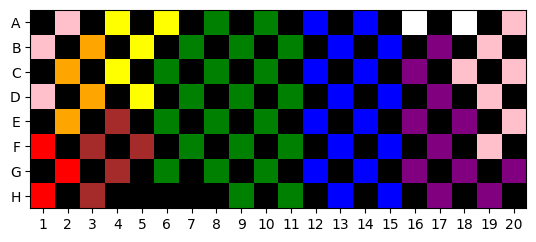

In [ ]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

In [2]:
# Percentage of chips named each color, per language
def percentage_color_languages(df):
    languages = ['english_color', 'spanish_color', 'tsimane_color']
    results = {}
    
    for language in languages:
        # Comparison of colors
        count = df[language].value_counts()
        
        # Calculate percentage
        percentage = (count / len(df) * 100).round(2)
        
        # Create Dataframe
        table = pd.DataFrame({
            'color': count.index,
            'number': count.values,
            'percentage': percentage.values
        })
        
        # 4. Ranger dans le dictionnaire
        results[language] = table
    
    return results

# Use on global dataframe
my_result = percentage_color_languages(df)

# Get results
english = my_result['english_color']
spanish = my_result['spanish_color']
tsimane = my_result['tsimane_color']
english

,color,number,percentage
0,green,22,27.50
1,blue,16,20.00
2,purple,11,13.75
3,pink,10,12.50
4,yellow,5,6.25
5,brown,5,6.25
6,orange,4,5.00
7,red,3,3.75
8,black,2,2.50
9,white,2,2.50


- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

In [ ]:
# Get df an labels
languages = [(english, 'english'), 
             (spanish, 'spanish'), 
             (tsimane, 'tsimane')]

# Loop to create plots
for df_language, label_language in languages:
    fig, ax =plt.subplots()
    ax.set_xlabel('percentage')
    plt.title(label_language)
    # Create a bar plot where 1 bar = 1 color, x = percentage
    plt.barh(df_language['color'], df_language['percentage'])

- Is there a correlation between languages? Create scatter plots. 
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
	
	- You might need to `merge` dataframes.

In [ ]:
merges = [(
    english, spanish, 'english', 'spanish', '_english', '_spanish'),
    (spanish, tsimane, 'spanish', 'tsimane', '_spanish', '_tsimane'),
    (tsimane, english, 'tsimane', 'english', '_english', '_tsimane')
    ]

for df, df2, label1, label2, suffixe1, suffixe2 in merges:
    merged_df = df.merge(df2,
                    on='color', 
                    how="inner", # Keep only colors present in both
                    suffixes=(suffixe1, suffixe2) # To suffixe new columns
                    )

    # Plot
    plt.figure() # New figure for each turn
    plt.scatter(merged_df['percentage'+suffixe1], merged_df['percentage'+suffixe2])
    plt.xlabel(label1)
    plt.ylabel(label2)